# Wine Quality Exploratory Data Analysis

Made by: Anthony Kevin Oktavius

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib
import plotly
import plotly.express as px
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Dataset Description**

In this dataset, there are 12 fields that can be used. Below are the details.
* Fixed Acidity
* Volatile Acidity
* Citric Acid
* Residual Sugar
* Chlorides
* Free Sulfur Dioxide
* Total Sulfur Dioxide
* Density
* pH
* Sulphates
* Alcohol
* Quality (score between 0 and 10)

## Data Loading

CSV Loading

In [5]:
red_wine_dataset = pd.read_csv("winequality-red.csv", sep = ';')
red_wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
white_wine_dataset = pd.read_csv("winequality-white.csv", sep = ';')
white_wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Dataset Field Info

In [7]:
red_wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
white_wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Dataset Statistics

In [9]:
red_wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
white_wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


List all Features

In [11]:
fixed_acidity_field = "fixed acidity"
volatile_acidity_field = "volatile acidity"
citric_acid_field = "citric acid"
residual_sugar_field = "residual sugar"
chlorides_field = "chlorides"
free_sulfur_dioxide_field = "free sulfur dioxide"
total_sulfur_dioxide_field = "total sulfur dioxide"
density_field = "density"
ph_field = "pH"
sulphates_field = "sulphates"
alcohol_field = "alcohol"
quality_field = "quality"

List all Numerical and Categorical Features

In [12]:
numerical_features = [fixed_acidity_field, volatile_acidity_field, citric_acid_field,
                      residual_sugar_field, chlorides_field, free_sulfur_dioxide_field,
                      total_sulfur_dioxide_field, density_field, ph_field, sulphates_field]
categorical_features = [quality_field]

## Data Visualization

## White Wine

### Single Variable

#### Categorical Variables

Pie Chart - Composition

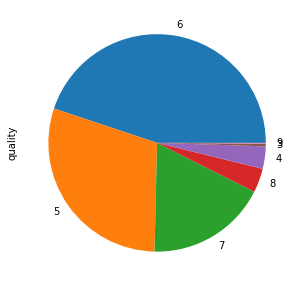

In [13]:
for index, feature in enumerate(categorical_features):
    white_wine_dataset[feature].value_counts().plot(kind = 'pie', figsize = (5, 5))

Box Plot - Comparison

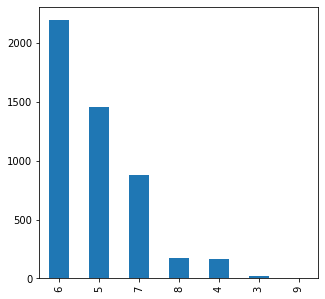

In [14]:
for index, feature in enumerate(categorical_features):
    white_wine_dataset[feature].value_counts().plot(kind = 'bar', figsize = (5, 5))

#### Numerical Variables

Distribution Plot - Distribution

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

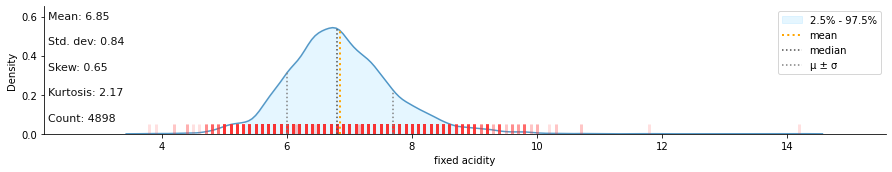

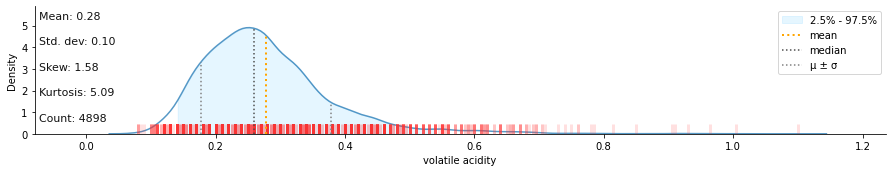

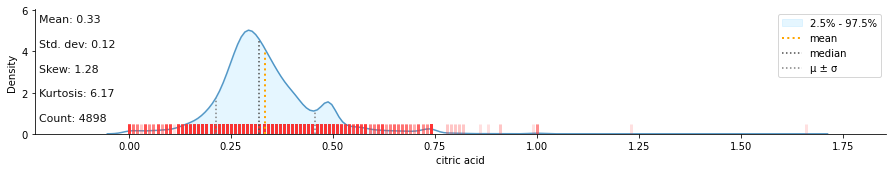

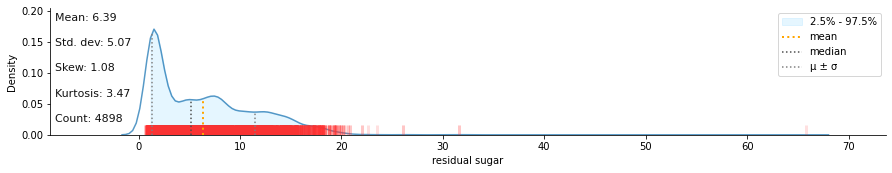

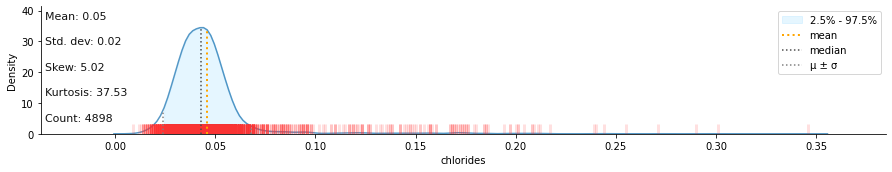

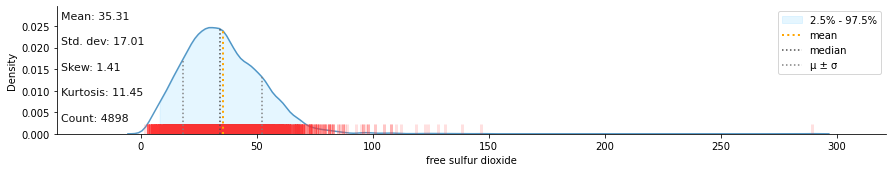

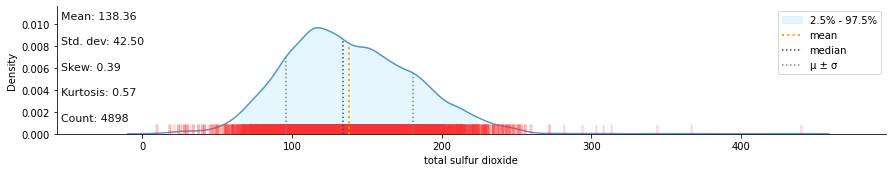

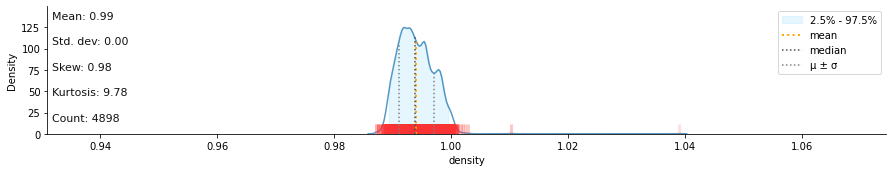

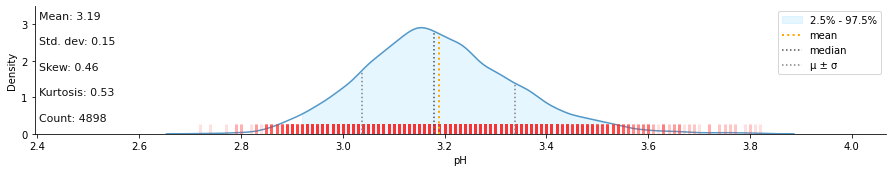

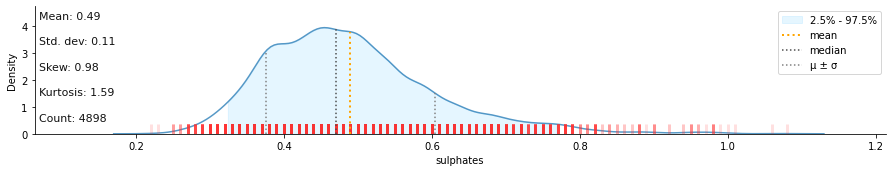

In [15]:
klib.dist_plot(white_wine_dataset[numerical_features])

### Two Variables

### Multiple Variables

## Red Wine

## Red and White Wine

### Two Variables

Multiple Bar Charts - Comparison & Composition

         fixed acidity
quality               
3             7.600000
4             7.129448
5             6.933974
6             6.837671
7             6.734716
8             6.657143
9             7.420000
         volatile acidity
quality                  
3                0.333250
4                0.381227
5                0.302011
6                0.260564
7                0.262767
8                0.277400
9                0.298000
         citric acid
quality             
3           0.336000
4           0.304233
5           0.337653
6           0.338025
7           0.325625
8           0.326514
9           0.386000
         residual sugar
quality                
3              6.392500
4              4.628221
5              7.334969
6              6.441606
7              5.186477
8              5.671429
9              4.120000
         chlorides
quality           
3         0.054300
4         0.050098
5         0.051546
6         0.045217
7         0.038191
8         0.038314
9 

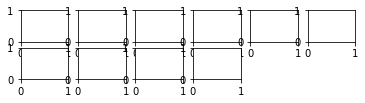

In [ ]:
stacked_bar_fields = numerical_features.copy()

for index, feature in enumerate(stacked_bar_fields):
    plt.subplot(6, 6, index + 1)

    print(white_wine_dataset[[quality_field, feature]].groupby(quality_field).mean())
    # white_wine_dataset[[quality_field, feature]].plot(kind = 'bar', stacked = True)

    # plt.xlabel("Wine Quality")
    # plt.ylabel(feature)
    # plt.title(f"{feature} - Mean")
    # plt.show()
